In [1]:
#importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# reading the dataset
df = pd.read_csv('Group_1_data.csv', low_memory=False)
df.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,NaN,0,udp,private,SF,105,146,0.1,0.2,0.3,...,254,1.00.1,0.01,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
1,0.0,0,udp,private,SF,105,146,0.0,0.0,0.0,...,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2,1.0,0,udp,private,SF,105,146,0.0,0.0,0.0,...,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal.
3,2.0,0,udp,private,SF,105,146,0.0,0.0,0.0,...,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,3.0,0,udp,private,SF,105,146,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [3]:
df.shape

(311029, 43)

In [4]:
# CHECK DUPLICATED
df.duplicated().sum()

0

In [5]:
# seeing the different data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311029 entries, 0 to 311028
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   311028 non-null  float64
 1   duration                     311029 non-null  int64  
 2   protocol_type                311029 non-null  object 
 3   service                      311029 non-null  object 
 4   flag                         311029 non-null  object 
 5   src_bytes                    311029 non-null  int64  
 6   dst_bytes                    311029 non-null  int64  
 7   land                         311029 non-null  float64
 8   wrong_fragment               311029 non-null  float64
 9   urgent                       311029 non-null  float64
 10  hot                          311029 non-null  float64
 11  num_failed_logins            311029 non-null  float64
 12  logged_in                    311029 non-null  float64
 13 

In [6]:
# first column is row numbering, so we have dropped first column
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [7]:
# dataset after removing first row
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,private,SF,105,146,0.1,0.2,0.3,0.4,...,254,1.00.1,0.01,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


### As shown below, our dataset does not have missing values

In [8]:
# seeing if there are any missing values
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

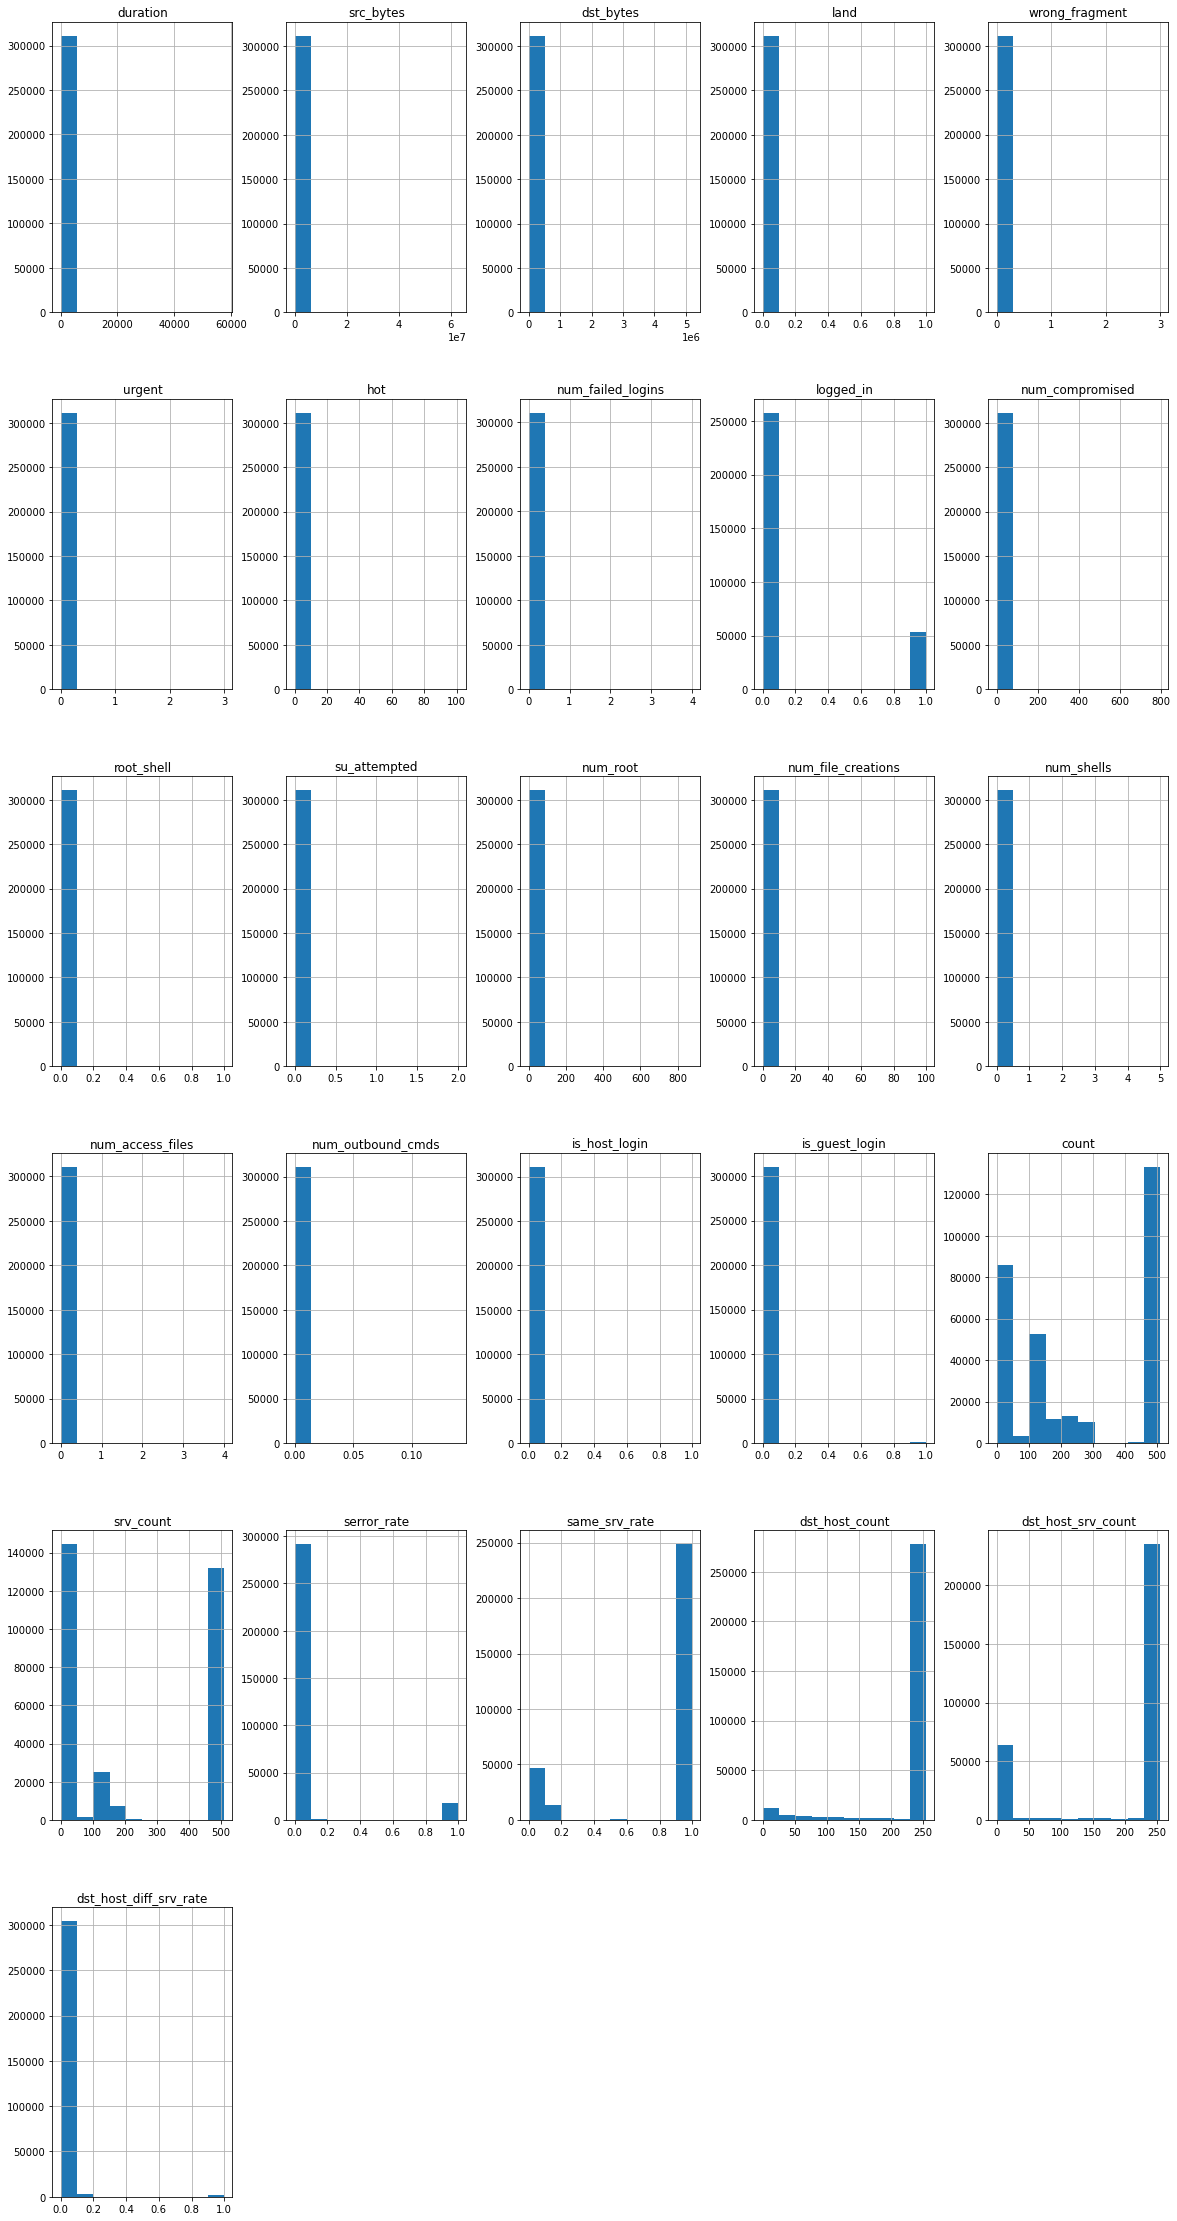

In [9]:
plot = df.hist(figsize = (20,40))

### converting the data from label column in to '0' if it is normal, otherwise '1', because it is our target variable


In [10]:
# converting the data from label column in to '0' if it is normal, otherwise '1', because it is our target variable

df['label'] = df.label.map(lambda x: 0 if x == 'normal.' else 1)
#df['label'] = label


In [11]:
#removing first row because it is erraneous
df=df.drop(df.index[0])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


<Figure size 1440x720 with 0 Axes>

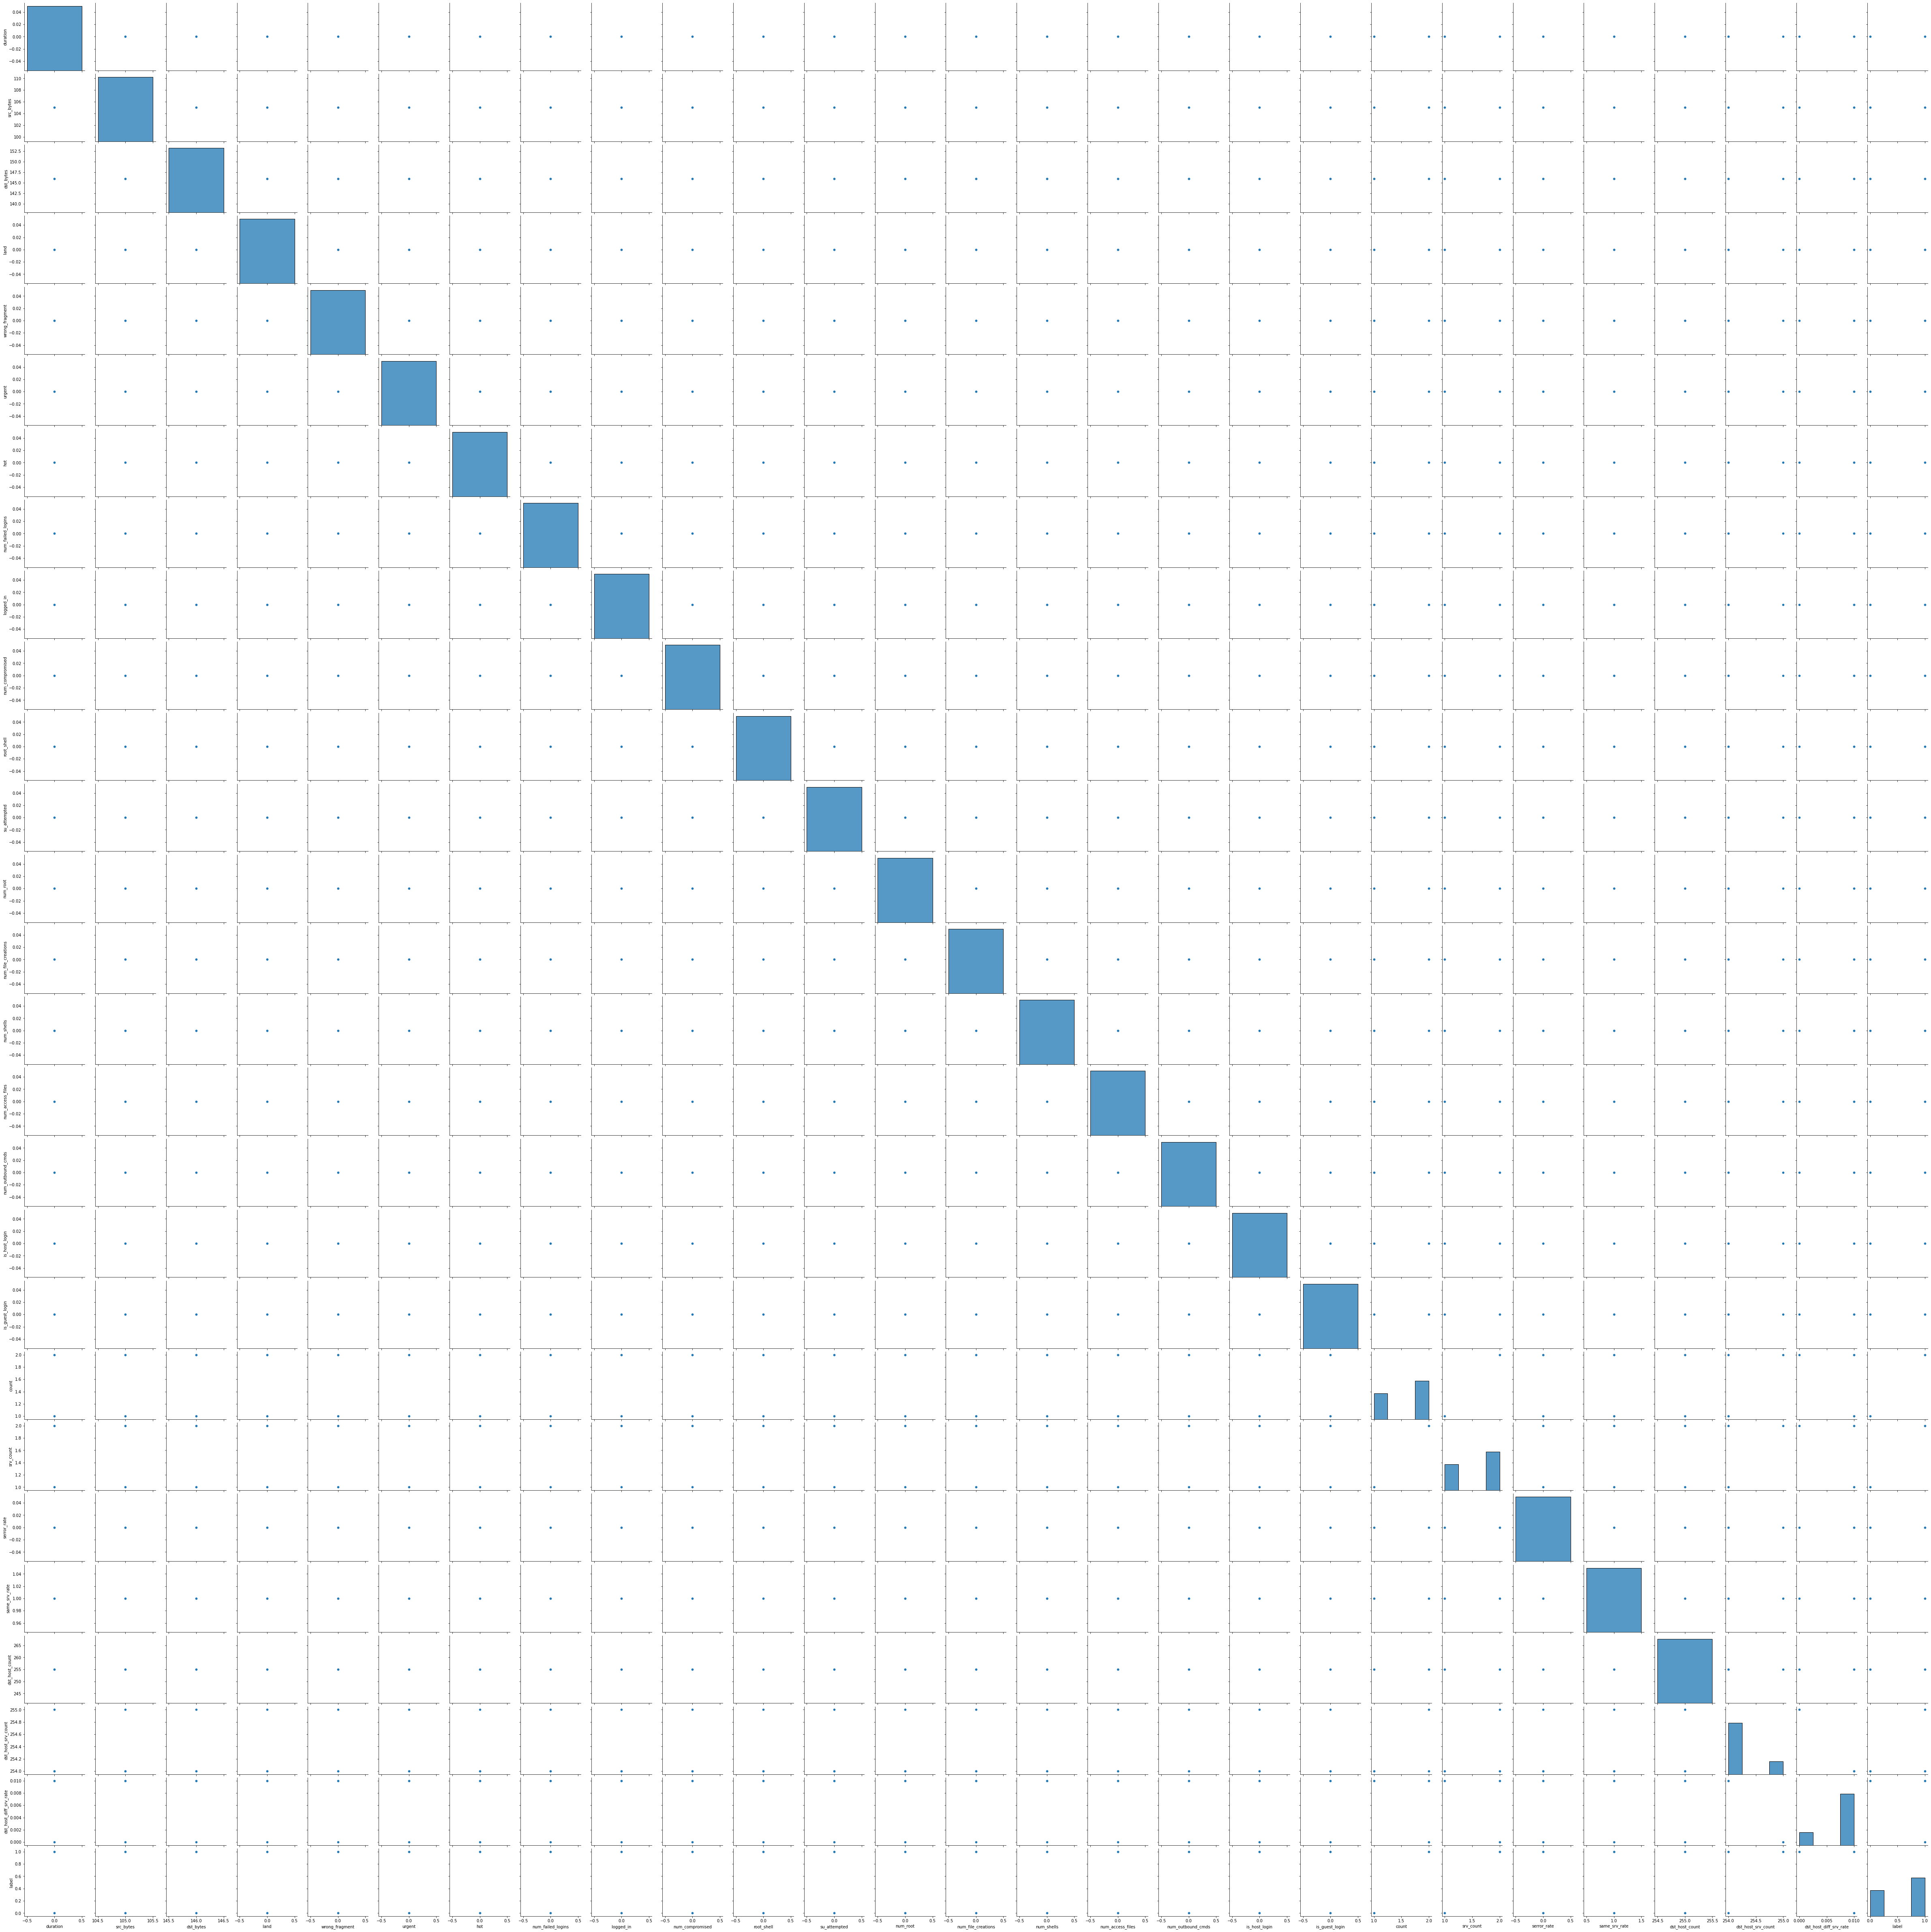

In [12]:
# Pairwise scatter plot
# it is very difficult to plot for all data values, so we have shown the pairplot for five rows for visualization
#plt.figure(figsize=(20, 10))
#sns.pairplot(df.loc[:5,:])
#plt.show()

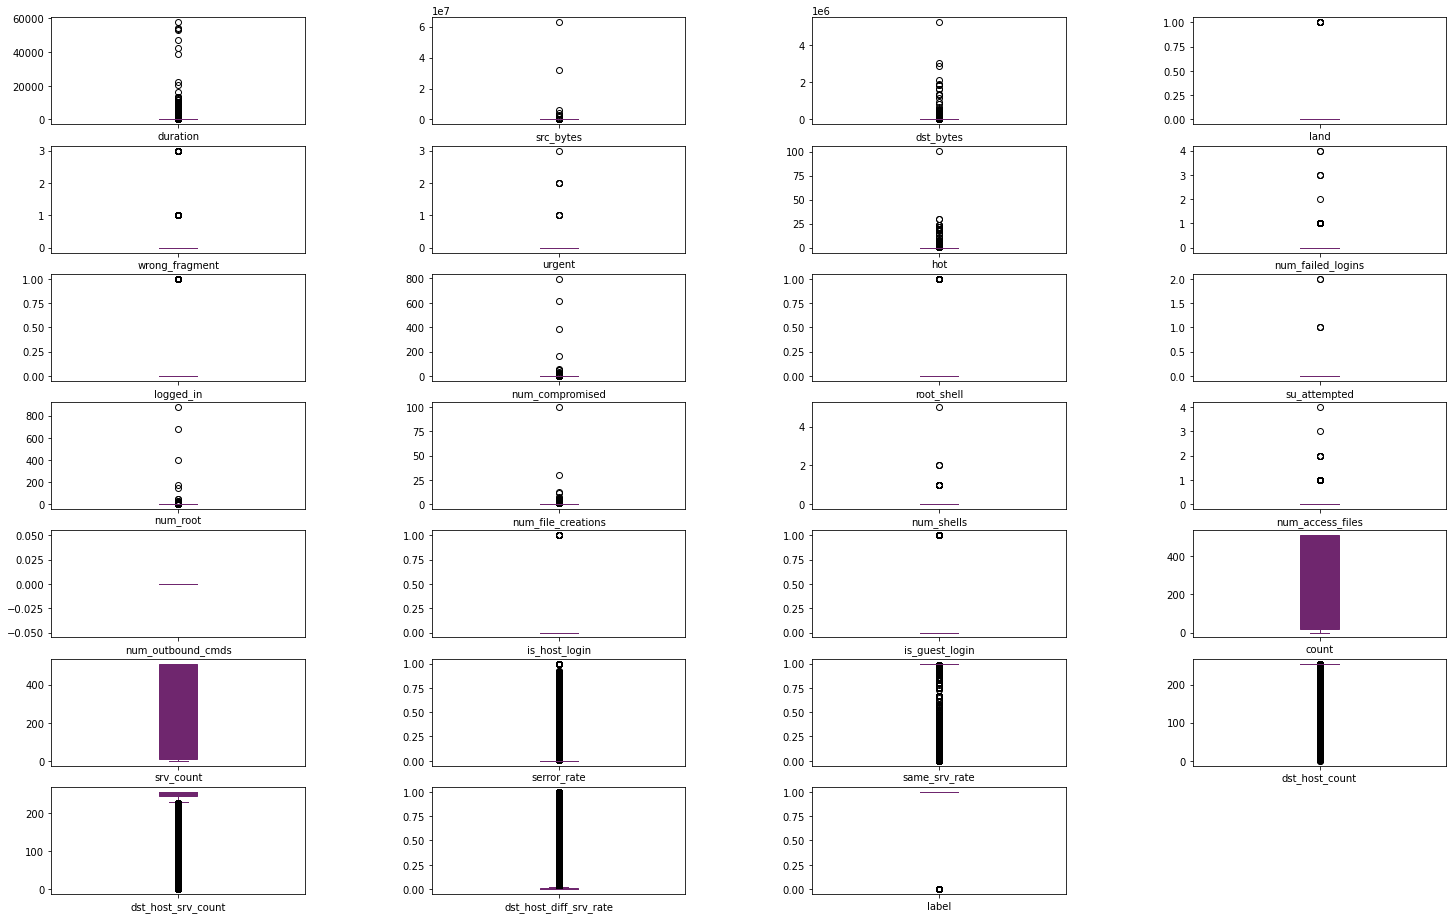

In [13]:
# plotting box plot for visualizing outliers

nums = df.select_dtypes(exclude=["category"])
nums.plot(subplots = True , kind ='box', layout = (15,4), figsize = (25,35), patch_artist= True ,color = "#6F266E")
plt.subplots_adjust(wspace = 0.5)
plt.style.use("ggplot")
plt.show()

### Converting 'rate' variables into float from object 

In [14]:
df['dst_host_same_src_port_rate'] = df['dst_host_same_src_port_rate'].astype('float')
df['dst_host_same_srv_rate'] = df['dst_host_same_srv_rate'].astype('float')
df['dst_host_srv_diff_host_rate'] = df['dst_host_srv_diff_host_rate'].astype('float')
df['dst_host_serror_rate'] = df['dst_host_serror_rate'].astype('float')
df['dst_host_rerror_rate'] = df['dst_host_rerror_rate'].astype('float')
df['dst_host_srv_rerror_rate'] = df['dst_host_srv_rerror_rate'].astype('float')
df['srv_serror_rate']=df['srv_serror_rate'].astype('float')
df['rerror_rate']=df['rerror_rate'].astype('float')
df['srv_rerror_rate']=df['srv_rerror_rate'].astype('float')
df['diff_srv_rate']=df['diff_srv_rate'].astype('float')
df['srv_diff_host_rate']=df['srv_diff_host_rate'].astype('float')
df['dst_host_srv_serror_rate']=df['dst_host_srv_serror_rate'].astype('float')



### Converting objects into categorical variables

In [15]:
df['protocol_type']=df['protocol_type'].astype('category')
df['service']=df['service'].astype('category')
df['flag']=df['flag'].astype('category')
df['logged_in']=df['logged_in'].astype('category')
df['root_shell']=df['root_shell'].astype('category')
df['is_host_login']=df['is_host_login'].astype('category')
df['is_guest_login']=df['is_guest_login'].astype('category')
df['land']=df['land'].astype('category')
df['num_outbound_cmds']=df['num_outbound_cmds'].astype('category')
df['label']=df['label'].astype('category')
df['wrong_fragment']=df['wrong_fragment'].astype('category')
df['urgent']=df['urgent'].astype('category')
df['su_attempted']=df['su_attempted'].astype('category')
df['num_access_files']=df['num_access_files'].astype('category')
df['num_shells']=df['num_shells'].astype('category')

In [16]:
# now we have changed the data types according to variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311028 entries, 1 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     311028 non-null  int64   
 1   protocol_type                311028 non-null  category
 2   service                      311028 non-null  category
 3   flag                         311028 non-null  category
 4   src_bytes                    311028 non-null  int64   
 5   dst_bytes                    311028 non-null  int64   
 6   land                         311028 non-null  category
 7   wrong_fragment               311028 non-null  category
 8   urgent                       311028 non-null  category
 9   hot                          311028 non-null  float64 
 10  num_failed_logins            311028 non-null  float64 
 11  logged_in                    311028 non-null  category
 12  num_compromised              311028 non-null

In [17]:
df.describe()

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,count,srv_count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311028.000000,3.110280e+05,3.110280e+05,311028.000000,311028.000000,311028.000000,311028.000000,311028.000000,311028.000000,311028.000000,...,311028.000000,311028.000000,311028.000000,311028.000000,311028.000000,311028.000000,311028.000000,311028.000000,311028.000000,311028.000000
mean,17.902793,1.731707e+03,7.479956e+02,0.014677,0.002363,0.011243,0.008359,0.000958,269.247881,235.580793,...,235.282618,199.193738,0.793494,0.024953,0.547920,0.004566,0.058764,0.058791,0.142659,0.141694
std,407.645054,1.276569e+05,1.612021e+04,0.312069,0.049990,1.958328,2.165200,0.193119,219.834239,239.308043,...,60.913386,100.306584,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346574
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,7.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,212.000000,126.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,511.000000,511.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,101.000000,4.000000,796.000000,878.000000,100.000000,511.000000,511.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df.shape

(311028, 42)

### Now clearing the outliers for numerical variables and removing the data points out of 3 standard deviations from the mean

In [19]:
df=df[np.abs(df.duration-df.duration.mean()) <= (3*df.duration.std())]
df=df[np.abs(df.src_bytes-df.src_bytes.mean()) <= (3*df.src_bytes.std())]
df=df[np.abs(df.dst_bytes-df.dst_bytes.mean()) <= (3*df.dst_bytes.std())]
df=df[np.abs(df.hot-df.hot.mean()) <= (3*df.hot.std())]
df=df[np.abs(df.num_failed_logins-df.num_failed_logins.mean()) <= (3*df.num_failed_logins.std())]
df=df[np.abs(df.num_compromised-df.num_compromised.mean()) <= (3*df.num_compromised.std())]
df=df[np.abs(df.num_root-df.num_root.mean()) <= (3*df.num_root.std())]
df=df[np.abs(df.num_file_creations-df.num_file_creations.mean()) <= (3*df.num_file_creations.std())]
df=df[np.abs(df.srv_count-df.srv_count.mean()) <= (3*df.srv_count.std())]
df=df[np.abs(df.serror_rate-df.serror_rate.mean()) <= (3*df.serror_rate.std())]
df=df[np.abs(df.srv_serror_rate-df.srv_serror_rate.mean()) <= (3*df.srv_serror_rate.std())]
df=df[np.abs(df.rerror_rate-df.rerror_rate.mean()) <= (3*df.rerror_rate.std())]
df=df[np.abs(df.srv_serror_rate-df.srv_serror_rate.mean()) <= (3*df.srv_serror_rate.std())]
df=df[np.abs(df.same_srv_rate-df.same_srv_rate.mean()) <= (3*df.same_srv_rate.std())]
df=df[np.abs(df.diff_srv_rate-df.diff_srv_rate.mean()) <= (3*df.diff_srv_rate.std())]
df=df[np.abs(df.srv_diff_host_rate-df.srv_diff_host_rate.mean()) <= (3*df.srv_diff_host_rate.std())]
df=df[np.abs(df.dst_host_diff_srv_rate-df.dst_host_diff_srv_rate.mean()) <= (3*df.dst_host_diff_srv_rate.std())]
df=df[np.abs(df.dst_host_srv_diff_host_rate-df.dst_host_srv_diff_host_rate.mean()) <= (3*df.dst_host_srv_diff_host_rate.std())]
df=df[np.abs(df.dst_host_serror_rate-df.dst_host_serror_rate.mean()) <= (3*df.dst_host_serror_rate.std())]
df=df[np.abs(df.dst_host_srv_serror_rate-df.dst_host_srv_serror_rate.mean()) <= (3*df.dst_host_srv_serror_rate.std())]
df=df[np.abs(df.dst_host_rerror_rate-df.dst_host_rerror_rate.mean()) <= (3*df.dst_host_rerror_rate.std())]
df=df[np.abs(df.dst_host_srv_rerror_rate-df.dst_host_srv_rerror_rate.mean()) <= (3*df.dst_host_srv_rerror_rate.std())]
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,udp,private,SF,105,147,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0
311025,0,udp,private,SF,105,147,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0
311026,0,udp,private,SF,105,147,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0
311027,0,udp,private,SF,105,147,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0


In [20]:
# so we can see the difference in the outliers
# for example for 'duration' variable, maximum value before clearing the outliers was 57715 and after clearing it is 1181.
df.describe()

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,count,srv_count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,274650.000000,274650.000000,274650.000000,274650.0,274650.0,274650.0,274650.0,274650.0,274650.000000,274650.000000,...,274650.000000,274650.000000,274650.000000,274650.000000,274650.000000,274650.000000,274650.000000,274650.0,274650.000000,274650.000000
mean,0.871203,919.961901,508.967872,0.0,0.0,0.0,0.0,0.0,290.296414,265.696439,...,238.333712,215.296974,0.852442,0.011169,0.610619,0.002539,0.000060,0.0,0.146527,0.145991
std,22.115003,8706.612722,2507.296883,0.0,0.0,0.0,0.0,0.0,221.024118,238.907307,...,56.253692,88.310265,0.340995,0.022759,0.482677,0.009912,0.001129,0.0,0.352124,0.352827
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,105.000000,0.000000,0.0,0.0,0.0,0.0,0.0,37.000000,10.000000,...,255.000000,254.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,520.000000,0.000000,0.0,0.0,0.0,0.0,0.0,268.000000,158.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,1032.000000,0.000000,0.0,0.0,0.0,0.0,0.0,511.000000,511.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,1181.000000,283618.000000,48451.000000,0.0,0.0,0.0,0.0,0.0,511.000000,511.000000,...,255.000000,255.000000,1.000000,0.130000,1.000000,0.100000,0.040000,0.0,1.000000,1.000000


### Saving the cleaned data file into csv

In [21]:
df.to_csv('Group_1_data_cleaned.csv')

### Converting the data into pickle file

In [22]:
df.to_pickle('Group_1_data_cleaned.pkl')

### Converting and saving data into npz file

In [23]:
df1= df.to_numpy()
np.savez('Group_1_data_cleaned.npz', df1)

### Now connecting to SQL database

In [24]:
!pip install pymysql
import pymysql.cursors 

In [25]:
# Connect to the database
connection = pymysql.connect(host='localhost',
    user='root', 
    password='*********')

In [26]:
connection.select_db('project')

In [27]:
curs = connection.cursor(pymysql.cursors.DictCursor)

In [28]:
sql = 'SELECT * from group_1_data_cleaned'
curs.execute(sql)

165412

In [29]:
df = pd.DataFrame(curs.fetchall())

In [30]:
display(df)

,MyUnknownColumn,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,1,0,udp,private,SF,105,146,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
1,2,0,udp,private,SF,105,146,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,3,0,udp,private,SF,105,146,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
3,4,0,udp,private,SF,105,146,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
4,5,0,udp,private,SF,105,146,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165407,181264,0,icmp,ecr_i,SF,1032,0,0.0,0.0,0.0,...,255,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,1
165408,181265,0,icmp,ecr_i,SF,1032,0,0.0,0.0,0.0,...,255,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,1
165409,181266,0,icmp,ecr_i,SF,1032,0,0.0,0.0,0.0,...,255,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,1
165410,181267,0,icmp,ecr_i,SF,1032,0,0.0,0.0,0.0,...,255,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,1


In [31]:
sql = 'SELECT * FROM group_1_data_cleaned WHERE label = 1'
curs.execute(sql)

130549

In [32]:
df = pd.DataFrame(curs.fetchall())
display(df)

,MyUnknownColumn,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,3,0,udp,private,SF,105,146,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
1,4,0,udp,private,SF,105,146,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
2,5,0,udp,private,SF,105,146,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1
3,8,0,udp,private,SF,105,146,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,10,0,udp,private,SF,105,146,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130544,181264,0,icmp,ecr_i,SF,1032,0,0.0,0.0,0.0,...,255,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,1
130545,181265,0,icmp,ecr_i,SF,1032,0,0.0,0.0,0.0,...,255,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,1
130546,181266,0,icmp,ecr_i,SF,1032,0,0.0,0.0,0.0,...,255,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,1
130547,181267,0,icmp,ecr_i,SF,1032,0,0.0,0.0,0.0,...,255,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,1


In [33]:
sql = 'SELECT * FROM group_1_data_cleaned WHERE duration > 0'
curs.execute(sql)

8876

In [34]:
df = pd.DataFrame(curs.fetchall())
display(df)

,MyUnknownColumn,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,171,1,tcp,smtp,SF,1676,333,0.0,0.0,0.0,...,157,0.84,0.10,0.03,0.01,0.0,0.0,0.0,0.0,0
1,221,5,tcp,http,SF,308,1713,0.0,0.0,0.0,...,255,1.00,0.00,0.01,0.01,0.0,0.0,0.0,0.0,0
2,335,38,tcp,http,SF,235,194,0.0,0.0,0.0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0
3,398,707,tcp,domain,SF,1562,0,0.0,0.0,0.0,...,1,0.00,0.02,0.00,0.00,0.0,0.0,0.0,0.0,1
4,399,703,tcp,X11,SF,57164,35576,0.0,0.0,0.0,...,1,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,157125,4,tcp,smtp,SF,2754,335,0.0,0.0,0.0,...,186,0.72,0.02,0.00,0.01,0.0,0.0,0.0,0.0,0
8872,157166,21,tcp,http,SF,328,189,0.0,0.0,0.0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0
8873,160141,235,udp,domain_u,SF,90,44,0.0,0.0,0.0,...,65,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,0
8874,162271,181,tcp,http,SF,317,307,0.0,0.0,0.0,...,255,1.00,0.00,0.01,0.03,0.0,0.0,0.0,0.0,0
